# Tansor Board

In [1]:
# imports Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

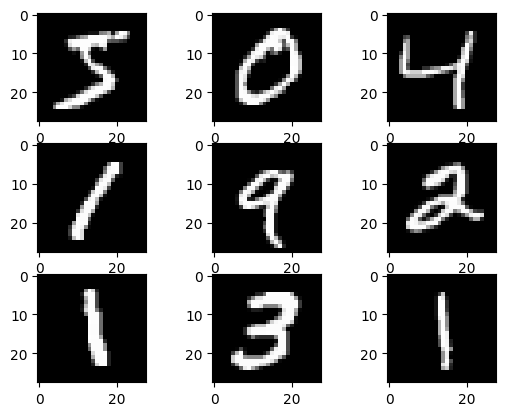

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
# Split dataset into X and y
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalize the pixels values into 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
# plot the fist 9 number in the traning set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
# create the model using convolutional layers, maxpooling layers, and dropout layers
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), # Update the pool size to match the input shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), # Change Dense layer units
    tf.keras.layers.Dropout(0.2), # Add Dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [20]:
# Complie the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
1875/1875 [==============================] - 56s 28ms/step - loss: 0.4867 - accuracy: 0.8408 - val_loss: 0.1864 - val_accuracy: 0.9417
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1988 - accuracy: 0.9387 - val_loss: 0.1569 - val_accuracy: 0.9523
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1545 - accuracy: 0.9516 - val_loss: 0.1067 - val_accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1329 - accuracy: 0.9590 - val_loss: 0.0984 - val_accuracy: 0.9685
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0933 - accuracy: 0.9703
Test accuracy: 0.970300018787384


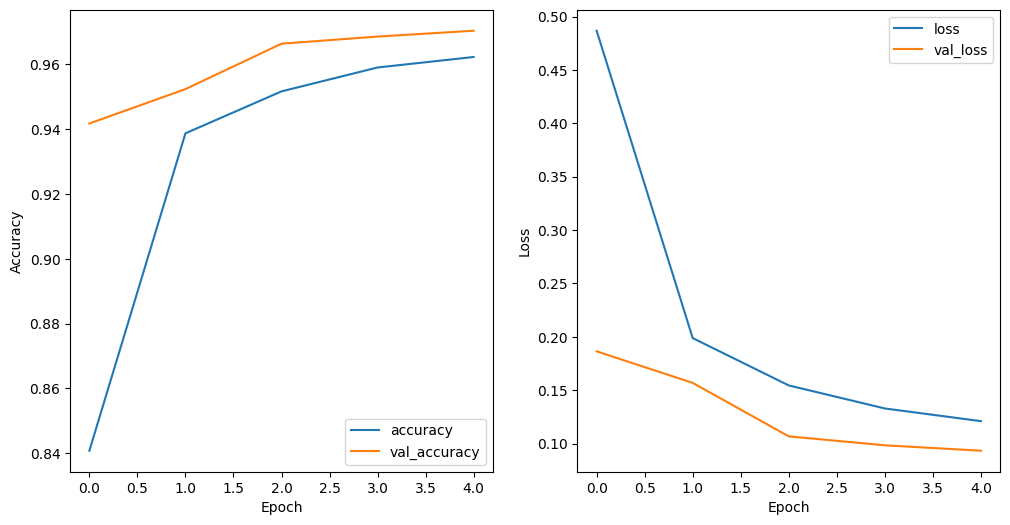

In [21]:
# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


# lets Do it on Tensor Board


In [22]:
# create the model using convolutional layers, maxpooling layers, and dropout layers
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)), # Update the pool size to match the input shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), # Change Dense layer units
    tf.keras.layers.Dropout(0.2), # Add Dropout layer with dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax'),
])
# Complie the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# lets create a tensorboard callback function 
TensorBoard_callback = TensorBoard(log_dir="logs", histogram_freq=1)
# now fit the model
history = model.fit(X_train, y_train, epochs=5,
                     validation_data=(X_test, y_test), 
                     callbacks=[TensorBoard_callback])

Epoch 1/5
1875/1875 [==============================] - 50s 25ms/step - loss: 0.5345 - accuracy: 0.8280 - val_loss: 0.2205 - val_accuracy: 0.9291
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2177 - accuracy: 0.9335 - val_loss: 0.1792 - val_accuracy: 0.9429
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1695 - accuracy: 0.9479 - val_loss: 0.1358 - val_accuracy: 0.9551
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1465 - accuracy: 0.9545 - val_loss: 0.1150 - val_accuracy: 0.9623
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1303 - accuracy: 0.9601 - val_loss: 0.1332 - val_accuracy: 0.9585


In [26]:
# Activate the  inline tensorboard
%load_ext tensorboard
%tensorboard --logdir=logs  
%matplotlib inline
%matplotlib notebook

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 22156), started 1:25:11 ago. (Use '!kill 22156' to kill it.)

# Hyper Parameters tuning and visualization using Tensor Board

In [27]:
# Define different optimizers
optimizer = ['Adam', 'SGD']
# Train the model with differnt optimizers and store each optimizer in a different call back function
for opt in optimizer:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)), # Update the pool size to match the input shape
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'), # Change Dense layer units
        tf.keras.layers.Dropout(0.2), # Add Dropout layer with dropout rate of 0.2
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
# compile the model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# define different batch sizes
    batch_size = [16,32, 64, 128]
# Train the model with different batch size and store each optimizer in a different call back function
    for batch in batch_size:
        log_dir = f"logs/{opt}/{batch}"
        TensorBoard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[TensorBoard_callback])



Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5528 - accuracy: 0.8244 - val_loss: 0.2141 - val_accuracy: 0.9312
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2223 - accuracy: 0.9308 - val_loss: 0.1635 - val_accuracy: 0.9478
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1710 - accuracy: 0.9467 - val_loss: 0.1333 - val_accuracy: 0.9567
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1457 - accuracy: 0.9550 - val_loss: 0.1194 - val_accuracy: 0.9639
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1318 - accuracy: 0.9588 - val_loss: 0.1086 - val_accuracy: 0.9671
Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1178 - accuracy: 0.9638 - val_loss: 0.1079 - val_accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1118 - accuracy: 0.9648 - val_loss: 0.0975 - val_accuracy

In [28]:
# Load the Tensorboard notebook extension
%load_ext tensorboard
%tensorboard --logdir=logs 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 22156), started 2:55:49 ago. (Use '!kill 22156' to kill it.)

In [31]:
# define model checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
%time
from tensorflow.keras.callbacks import TensorBoard
# Import model checkpoint callback
# define different optimizers
optimizer = ['Adam', 'SGD']
# Train the model with differnt optimizers and store each optimizer in a different call back function
for opt in optimizer:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)), # Update the pool size to match the input shape
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'), # Change Dense layer units
        tf.keras.layers.Dropout(0.2), # Add Dropout layer with dropout rate of 0.2
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
# compile the model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# define different batch sizes
    batch_size = [16,32, 64, 128]
# Train the model with different batch size and store each optimizer in a different call back function
    for batch in batch_size:
        log_dir = f"logs/{opt}/{batch}"
        # Define the ModelCheckpoint callback to save the best model during training
        checkpoint = ModelCheckpoint(f"models/{opt}_{batch}.h5", monitor='val_accuracy', save_best_only=True)
        # Define the TensorBoard callback

        TensorBoard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[TensorBoard_callback])
# load the Tensorboard notebook extension
%load_ext tensorboard
%tensorboard --logdir=logs


CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5071 - accuracy: 0.8382 - val_loss: 0.2056 - val_accuracy: 0.9371
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2065 - accuracy: 0.9362 - val_loss: 0.1536 - val_accuracy: 0.9530
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1581 - accuracy: 0.9510 - val_loss: 0.1251 - val_accuracy: 0.9614
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1366 - accuracy: 0.9582 - val_loss: 0.1151 - val_accuracy: 0.9639
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1230 - accuracy: 0.9629 - val_loss: 0.1223 - val_accuracy: 0.9631
Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1116 - accuracy: 0.9653 - val_loss: 0.0868 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1044 - accurac

Reusing TensorBoard on port 6006 (pid 22156), started 3:32:34 ago. (Use '!kill 22156' to kill it.)